In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

In [4]:
df = pd.read_csv("airbnb2.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:
# CHECKING FOR MISSING VALUES
df.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,4
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [6]:
#DROPPING MISSING VALUES
df.dropna(axis = 0, inplace = True, subset = ['first_review','host_response_rate','last_review','neighbourhood','host_has_profile_pic','host_identity_verified','host_since','thumbnail_url','zipcode'])

In [7]:
#REPLACING MISSING VALUES WITH MEAN
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['beds'] = df['beds'].fillna(df['beds'].mean())

In [8]:
df_train, df_test  = train_test_split(df, test_size=0.2, random_state = 42)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 517 to 202
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      313 non-null    int64  
 1   log_price               313 non-null    float64
 2   property_type           313 non-null    object 
 3   room_type               313 non-null    object 
 4   amenities               313 non-null    object 
 5   accommodates            313 non-null    int64  
 6   bathrooms               313 non-null    float64
 7   bed_type                313 non-null    object 
 8   cancellation_policy     313 non-null    object 
 9   cleaning_fee            313 non-null    bool   
 10  city                    313 non-null    object 
 11  description             313 non-null    object 
 12  first_review            313 non-null    object 
 13  host_has_profile_pic    313 non-null    object 
 14  host_identity_verified  313 non-null    objec

In [10]:
df_train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,3.130000e+02,313.000000,313.000000,313.00000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,1.115164e+07,4.740436,3.210863,1.22823,38.727558,-91.303909,29.929712,94.230032,1.237173,1.779553
std,6.200112e+06,0.694365,2.095541,0.49933,2.982716,21.926503,40.080706,5.859858,0.805527,1.165461
min,1.664100e+04,2.944439,1.000000,0.00000,33.722757,-122.501095,1.000000,72.000000,0.000000,1.000000
25%,5.526245e+06,4.317488,2.000000,1.00000,34.184915,-118.347887,6.000000,92.000000,1.000000,1.000000
50%,1.192730e+07,4.691348,2.000000,1.00000,40.682071,-73.997202,16.000000,96.000000,1.000000,1.000000
75%,1.644560e+07,5.135798,4.000000,1.00000,40.752939,-73.945200,36.000000,99.000000,1.000000,2.000000
max,2.118810e+07,7.003065,12.000000,4.00000,42.382883,-71.049672,289.000000,100.000000,5.000000,7.000000


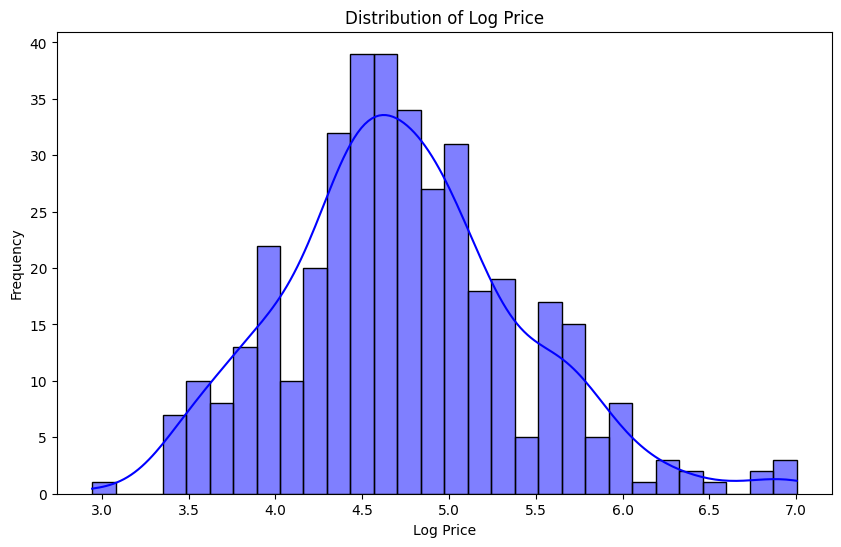

In [11]:
# distribution of price across the dataset

#histogram with kde for `log_price`
#KDE is the lining above the histogram indicates density estimate for better analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

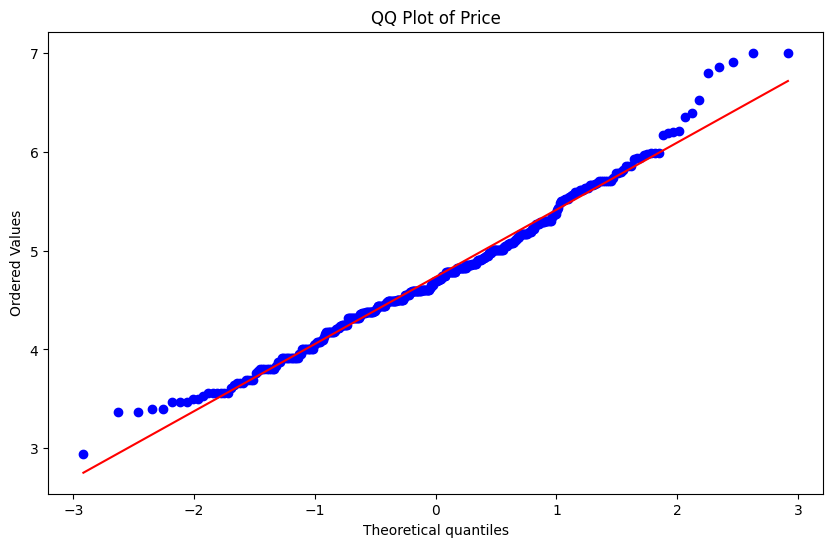

In [12]:
#qqplot of the price
plt.figure(figsize=(10, 6))
stats.probplot(df['log_price'], dist="norm", plot=plt)
plt.title('QQ Plot of Price')
plt.show()

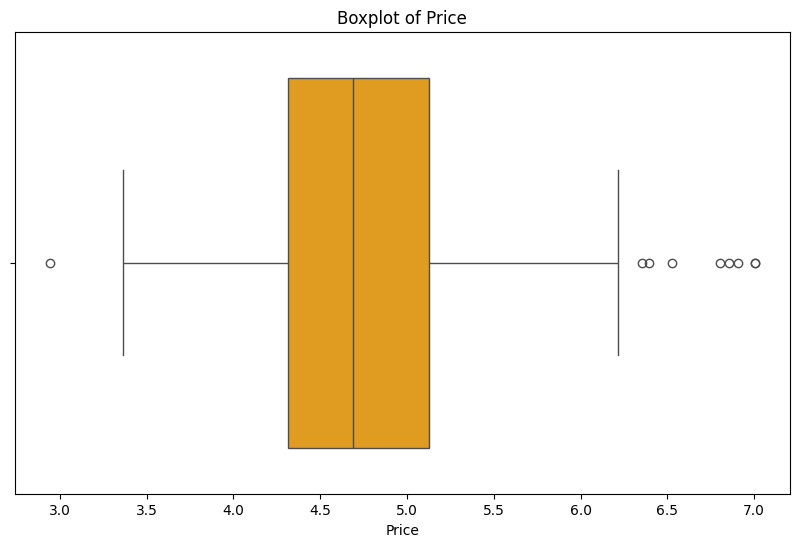

In [13]:
# check for outliers in the dataset (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_price'], color='orange')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

In [14]:
# Calculate Q1, Q3, and IQR
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['log_price'] < lower_bound) | (df['log_price'] > upper_bound)]
print("Number of outliers: ", len(outliers))

Number of outliers:  9


In [15]:
#  Handle outliers
df_cleaned = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]
print(df_cleaned.shape)

(383, 29)


In [16]:
# Handle the categorical values
# Handling categorical values with one-hot encoding
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

print("Categorical values handled with one-hot encoding.")
print("Updated dataset shape:", df_encoded.shape)


Categorical values handled with one-hot encoding.
Updated dataset shape: (383, 216)


In [17]:
# Normalize the numerical values
# Columns to normalize
numerical_columns = ['log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
                     'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply scaling
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

print("Numerical values normalized.")
print(df_encoded[numerical_columns].describe())

Numerical values normalized.
        log_price  accommodates   bathrooms    latitude   longitude  \
count  383.000000    383.000000  383.000000  383.000000  383.000000   
mean     0.467343      0.190126    0.344227    0.570670    0.602902   
std      0.216700      0.173900    0.131592    0.347236    0.426897   
min      0.000000      0.000000    0.000000    0.000000    0.000000   
25%      0.333716      0.090909    0.285714    0.051280    0.080767   
50%      0.451887      0.090909    0.285714    0.803353    0.942699   
75%      0.599821      0.272727    0.285714    0.810877    0.943713   
max      1.000000      1.000000    1.000000    1.000000    1.000000   

       number_of_reviews  review_scores_rating    bedrooms        beds  
count         383.000000            383.000000  383.000000  383.000000  
mean            0.096169              0.856157    0.241898    0.101828  
std             0.138751              0.148062    0.157615    0.159871  
min             0.000000              0

In [18]:
# to remove unwanted columns using feature importance

#dropping 'object' columns
df_encoded1 = df_encoded.drop(columns=["amenities", "description", "name", "thumbnail_url"], axis=1)

#dropping 'neighbourhood_' columns
df_encoded1 = df_encoded1.loc[:, ~df_encoded1.columns.str.startswith('neighbourhood_')]

#handling date columns
date_columns = ["first_review", "host_since", "last_review"]
for column in date_columns:
    df_encoded1[column] = pd.to_datetime(df_encoded1[column])
    df_encoded1[f'{column}_Year'] = df_encoded1[column].dt.year
    df_encoded1[f'{column}_Month'] = df_encoded1[column].dt.month
    df_encoded1[f'{column}_Day'] = df_encoded1[column].dt.day
    df_encoded1 = df_encoded1.drop(column, axis=1)  # Drop the original date column

#converting string to float64
df_encoded1["host_response_rate"] = df_encoded1["host_response_rate"].str.replace('%', '').astype(float)

#replacing 't' and 'f' with bool vlaues
columns_to_transform = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
df_encoded1[columns_to_transform] = df_encoded1[columns_to_transform].replace({'t': True, 'f': False})

#seperating features and target variable
X = df_encoded1.drop(columns=["log_price"], axis = 1)
y = df_encoded1["log_price"]

#taining random forest regressor
model = RandomForestRegressor()
model.fit(X, y)

#feature importance
importances = model.feature_importances_

#df for better visualization of feature importance
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

threshold = 0.01
important_features = feature_importance_df[feature_importance_df["Importance"] >= threshold]["Feature"]

#remove unwanted columns
df_selected = X[important_features]

<ipython-input-18-236cd2552aec>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded1[columns_to_transform] = df_encoded1[columns_to_transform].replace({'t': True, 'f': False})


# Model training

In [ ]:
# use linear regression to train the model
X_train, X_test, y_train, y_test = train_test_split(df_selected, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Model Evaluation

In [19]:
# evaluate the model on the testing dataset

# Evaluate Random Forest model
y_pred_rf = model.predict(X)

mse_rf = mean_squared_error(y, y_pred_rf)
mae_rf = mean_absolute_error(y, y_pred_rf)
r2_rf = r2_score(y, y_pred_rf)

# Print evaluation metrics for Random Forest
print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R²): {r2_rf}")

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.0022915271106939902
Mean Absolute Error (MAE): 0.037371635649379564
R-squared (R²): 0.9510736138218115


In [20]:
#test on an instance
instance = X_test.iloc[0].values.reshape(1, -1)
predicted_value = linear_reg.predict(instance)

print(f"predicted value: {predicted_value[0]}")
print(f"actual value: {y_test.iloc[0]}")

NameError: name 'X_test' is not defined

In [21]:

#Make predictions with the trained Linear Regression model
lr_pred = linear_reg.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, lr_pred)
mae_lr = mean_absolute_error(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)

print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"R-squared (R²): {r2_lr:.4f}")

NameError: name 'linear_reg' is not defined

In [ ]:
metrics = ['MSE', 'MAE', 'R²']
rf_metrics = [mse_rf, mae_rf, r2_rf]
lr_metrics = [mse_lr, mae_lr, r2_lr]

evaluation_df = pd.DataFrame({
    'Metrics': metrics,
    'Random Forest': rf_metrics,
    'Linear Regression': lr_metrics
})

# Plotting the comparison
evaluation_df.set_index('Metrics').plot(kind='bar', figsize=(8, 6))
plt.title('Model Comparison')
plt.ylabel('Metric Value')
plt.show()

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
df['property_type'] = df['property_type'].astype('category').cat.codes
df['bed_type'] = df['bed_type'].astype('category').cat.codes
df['amenities'] = df['amenities'].astype('category').cat.codes
df['price_per_person'] = np.exp(df['log_price']) / df['accommodates']
X = df[['property_type', 'bed_type', 'accommodates', 'bathrooms', 'price_per_person']]
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Mean Absolute Error: 0.06315611314352143
